# 1. Import packages

In [1]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
import PyComplexHeatmap
from PyComplexHeatmap import *

# 2. Load an example brain networks dataset from seaborn

In [2]:
import seaborn as sns

# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")
corr_mat['Level']=corr_mat.correlation.apply(lambda x:'High' if x>=0.7 else 'Middle' if x >= 0.3 else 'Low')
data=corr_mat.pivot(index='level_0',columns='level_1',values='correlation')

In [3]:
data.head()

level_1,1-1-lh,1-1-rh,12-1-lh,12-1-rh,12-2-lh,12-2-rh,12-3-lh,13-1-lh,13-1-rh,13-2-lh,...,7-2-lh,7-2-rh,7-3-lh,7-3-rh,8-1-lh,8-1-rh,8-2-lh,8-2-rh,8-3-lh,8-3-rh
level_0,,,,,,,,,,,,,,,,,,,,,
1-1-lh,1.000000,0.881516,-0.049793,0.026902,-0.144335,-0.141253,0.119250,-0.261589,-0.272701,-0.370021,...,-0.366065,-0.325680,-0.196770,-0.144566,-0.366818,-0.388756,-0.352529,-0.363982,-0.341524,-0.350452
1-1-rh,0.881516,1.000000,-0.112697,-0.036909,-0.144277,-0.189683,0.084633,-0.324230,-0.332886,-0.374322,...,-0.361036,-0.274151,-0.142392,-0.070452,-0.358625,-0.402173,-0.302286,-0.339989,-0.315931,-0.343379
12-1-lh,-0.049793,-0.112697,1.000000,0.343464,0.470239,0.100802,0.438449,0.339667,0.089811,0.272394,...,-0.036493,-0.171179,-0.043298,-0.158039,0.005598,-0.060007,0.079078,-0.040060,0.027878,-0.075781
12-1-rh,0.026902,-0.036909,0.343464,1.000000,0.130549,0.278569,0.127621,-0.014404,0.051249,-0.090130,...,-0.170053,-0.124278,-0.112148,-0.063705,-0.172007,-0.040629,-0.079687,0.024864,-0.092263,-0.068858
12-2-lh,-0.144335,-0.144277,0.470239,0.130549,1.000000,0.521377,0.506652,0.320966,0.141884,0.608392,...,-0.075986,-0.095015,0.012966,-0.082816,0.023340,0.058718,0.034181,0.033355,-0.022982,0.025638


In [4]:
corr_mat.Level.value_counts().index.tolist()

['Low', 'Middle', 'High']

# 3. Dot Heatmap

## Plot traditional heatmap using square marker `marker='s'`

{'1.0': 8.010947368421052, '0.8': 6.408757894736842, '0.6': 4.8065684210526305, '0.4': 3.204378947368421, '0.2': 1.6021894736842106} {'1.0': 'o', '0.8': 'o', '0.6': 'o', '0.4': 'o', '0.2': 'o'}


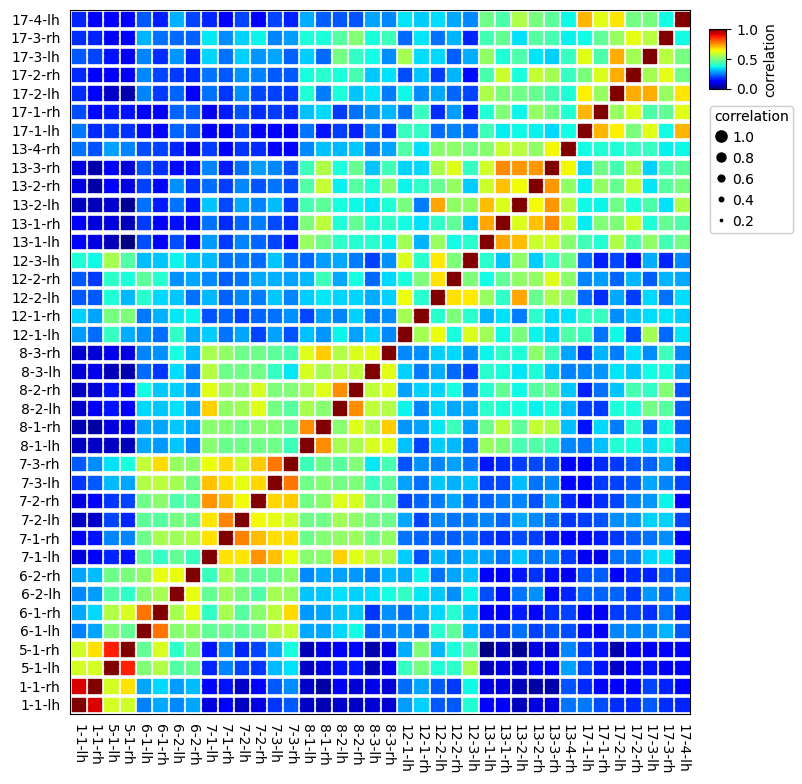

In [5]:
plt.figure(figsize=(8,8))
ax=dotHeatmap(corr_mat,x='level_0',y='level_1',value='correlation',
              cmap='jet',vmax=1,vmin=0,s=0.7,marker='s',alpha=0.7)
ax.grid(which='minor',color='white',linestyle='--',alpha=0.6,linewidth=1)
plt.show()

## Simple dot heatmap using fixed dot size
In default, using circle marker: `marker='o'`

{'1.0': 11.44421052631579, '0.8': 9.155368421052632, '0.6': 6.866526315789473, '0.4': 4.577684210526316, '0.2': 2.288842105263158} {'1.0': 'o', '0.8': 'o', '0.6': 'o', '0.4': 'o', '0.2': 'o'}


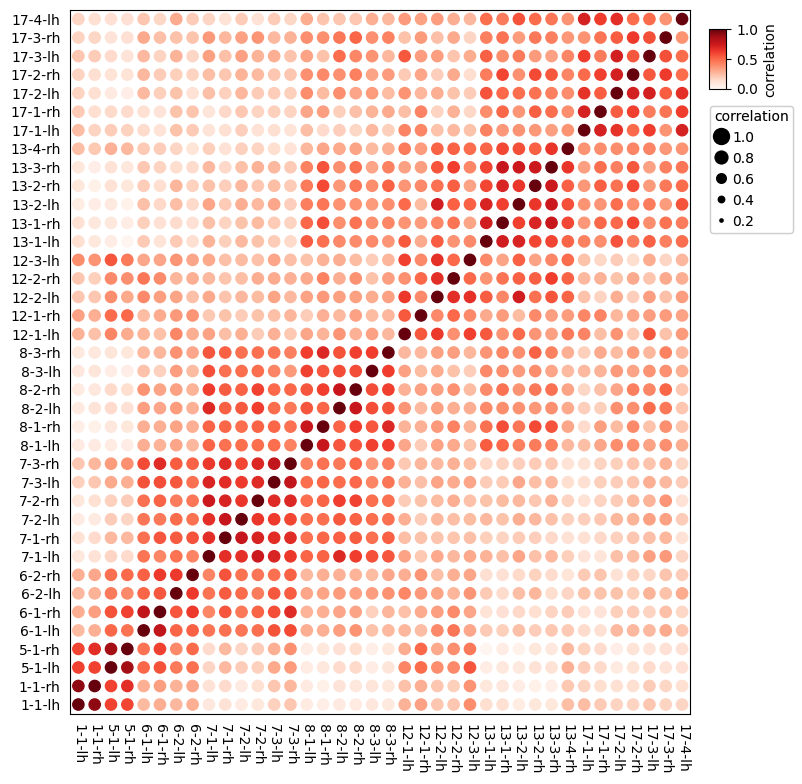

In [6]:
plt.figure(figsize=(8,8))
ax=dotHeatmap(corr_mat,x='level_0',y='level_1',value='correlation',
              cmap='Reds',vmax=1,vmin=0,s=0.5)
# ax.grid(which='minor',color='gray',linestyle='--',alpha=0.6)
# ax.grid(which='major',color='black',linestyle='--',alpha=0.2)
plt.show()

## Changing the size of point
In default, we determined the size of the points based on the `value` col if parameter `s` was not given

{'1.0': 11.44421052631579, '0.8': 9.155368421052632, '0.6': 6.866526315789473, '0.4': 4.577684210526316, '0.2': 2.288842105263158} {'1.0': 'o', '0.8': 'o', '0.6': 'o', '0.4': 'o', '0.2': 'o'}


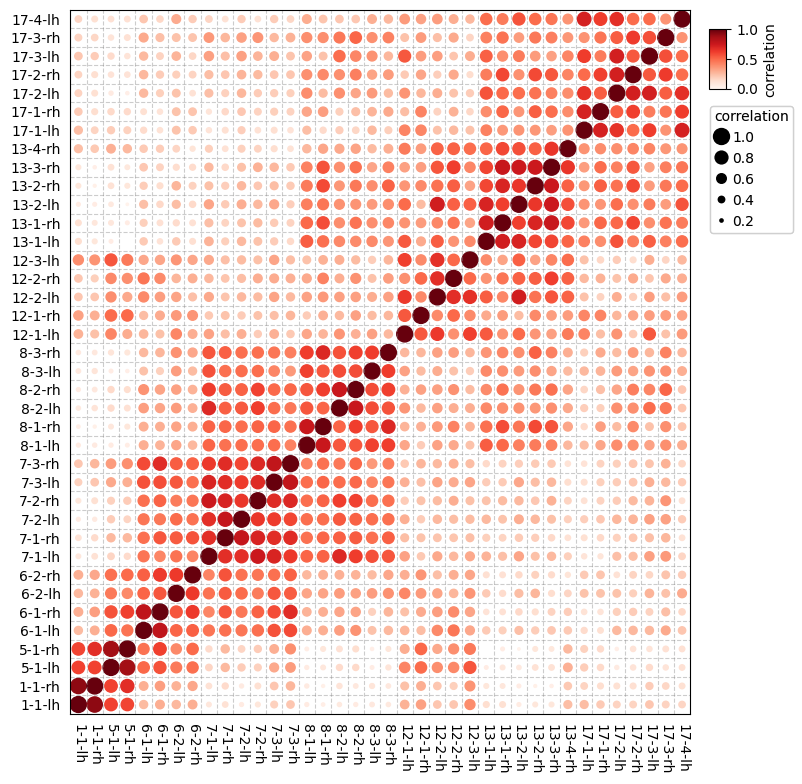

In [7]:
plt.figure(figsize=(8,8))
ax=dotHeatmap(corr_mat,x='level_0',y='level_1',value='correlation',
              cmap='Reds',vmax=1,vmin=0)
ax.grid(which='minor',color='gray',linestyle='--',alpha=0.4)
# ax.grid(which='major',color='white',linestyle='--',alpha=0.4)
plt.show()

## Add parameter `hue` and use different `colors` for different groups

{'1.0': 11.44421052631579, '0.8': 9.155368421052632, '0.6': 6.866526315789473, '0.4': 4.577684210526316, '0.2': 2.288842105263158} {'1.0': 'o', '0.8': 'o', '0.6': 'o', '0.4': 'o', '0.2': 'o'}


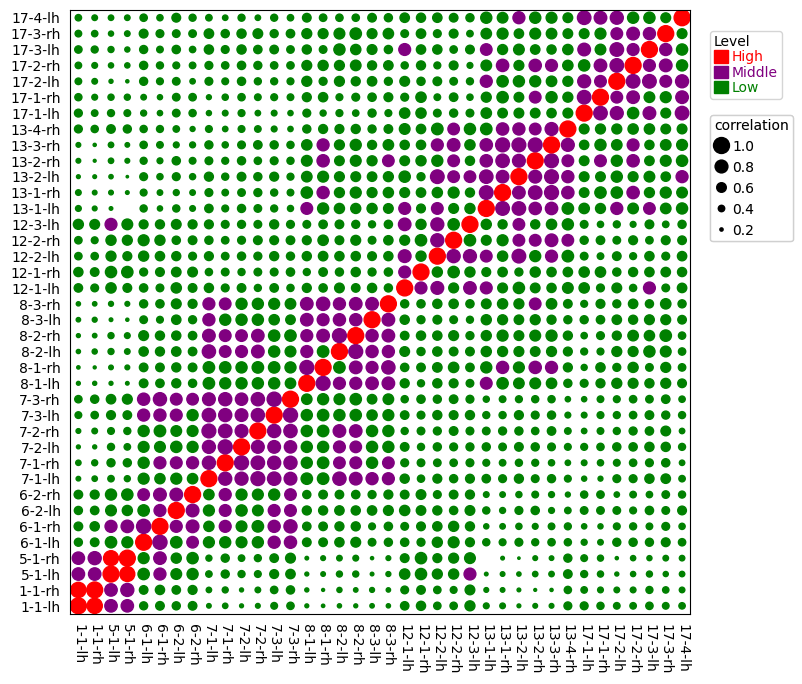

In [8]:
plt.figure(figsize=(8,8))
ax=dotHeatmap(corr_mat,x='level_0',y='level_1',value='correlation',hue='Level',
              colors={'High':'red','Middle':'purple','Low':'green'},vmax=1,vmin=0)
plt.show()

## Add parameter `hue` and use different `cmap` and `marker` for different groups

{'High': 10.29978947368421, 'Middle': 10.29978947368421, 'Low': 10.29978947368421} {'High': 'P', 'Middle': '*', 'Low': 'D'}
{'1.0': 10.29978947368421, '0.8': 8.239831578947369, '0.6': 6.179873684210526, '0.4': 4.119915789473684, '0.2': 2.059957894736842} {'1.0': 'o', '0.8': 'o', '0.6': 'o', '0.4': 'o', '0.2': 'o'}


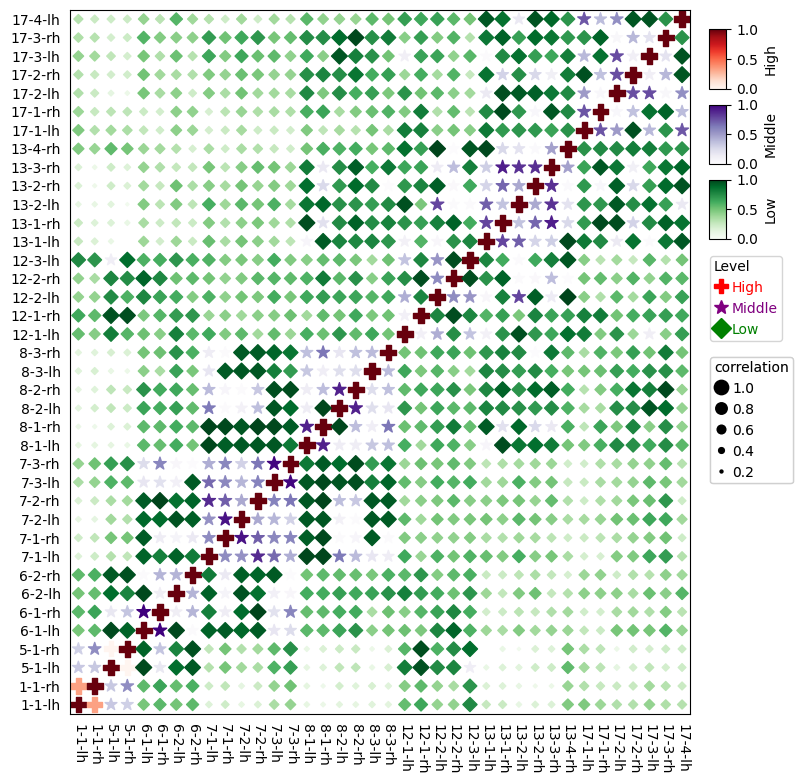

In [9]:
plt.figure(figsize=(8,8))
ax=dotHeatmap(corr_mat,x='level_0',y='level_1',value='correlation',hue='Level',
              cmap={'High':'Reds','Middle':'Purples','Low':'Greens'},
              colors={'High':'red','Middle':'purple','Low':'green'},
              marker={'High':'P','Middle':'*','Low':'D'},
              vmax=1,vmin=0,alpha=0.9)
plt.show()

# 4. Dot Clustermap

## 4.1 Plot clustermap using seaborn brain networks dataset

In [10]:
corr_mat.head()

,level_0,level_1,correlation,Level
0,1-1-lh,1-1-lh,1.000000,High
1,1-1-lh,1-1-rh,0.881516,High
2,1-1-lh,5-1-lh,0.431619,Middle
3,1-1-lh,5-1-rh,0.418708,Middle
4,1-1-lh,6-1-lh,-0.084634,Low


In [11]:
df_row=corr_mat['level_0'].drop_duplicates().to_frame()
df_row['RowGroup']=df_row.level_0.apply(lambda x:x.split('-')[0])
df_row.set_index('level_0',inplace=True)

df_col=corr_mat['level_1'].drop_duplicates().to_frame()
df_col['ColGroup']=df_col.level_1.apply(lambda x:x.split('-')[0])
df_col.set_index('level_1',inplace=True)

print(df_row.head())
print(df_col.head())

        RowGroup
level_0         
1-1-lh   1      
1-1-rh   1      
5-1-lh   5      
5-1-rh   5      
6-1-lh   6      
        ColGroup
level_1         
1-1-lh   1      
1-1-rh   1      
5-1-lh   5      
5-1-rh   5      
6-1-lh   6      


{'High': 8.507016635845146, 'Middle': 8.507016635845146, 'Low': 8.507016635845146} {'High': 'P', 'Middle': '*', 'Low': 'D'}
{'1.0': 8.507016635845146, '0.8': 6.805613308676117, '0.6': 5.104209981507088, '0.4': 3.4028066543380584, '0.2': 1.7014033271690292} {'1.0': 'o', '0.8': 'o', '0.6': 'o', '0.4': 'o', '0.2': 'o'}


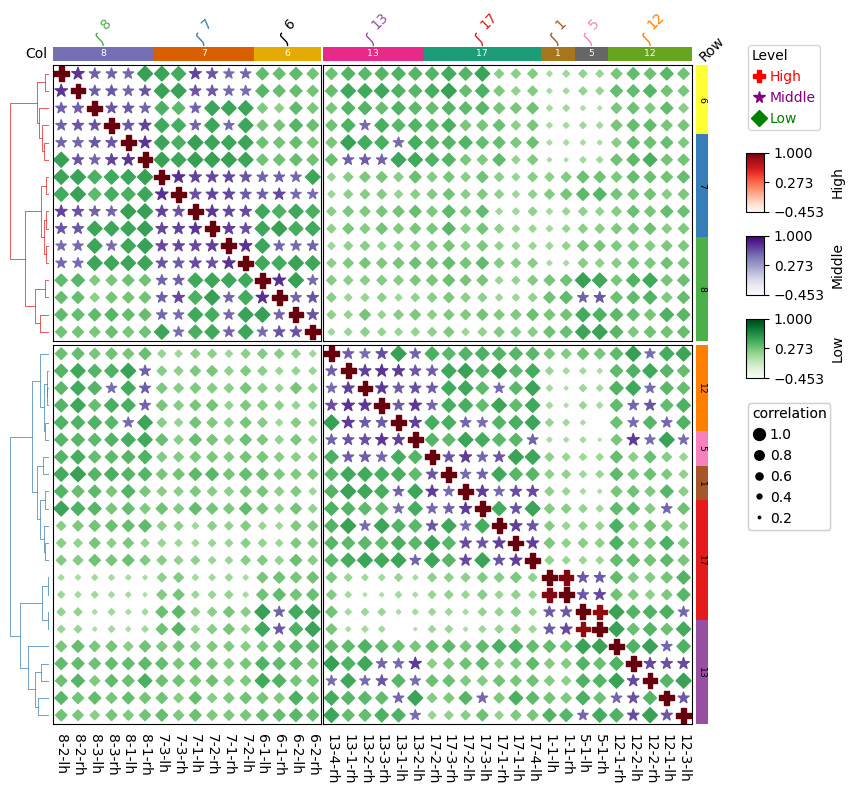

In [12]:
row_ha = HeatmapAnnotation(Row=anno_simple(df_row.RowGroup,cmap='Set1',
                                           add_text=True,text_kws={'color':'black','rotation':-90},
                                          legend=False),
                           axis=0,verbose=0,label_kws={'rotation':45,'horizontalalignment':'left'})

col_ha = HeatmapAnnotation(label=anno_label(df_col.ColGroup, merge=True,rotation=45),
                           Col=anno_simple(df_col.ColGroup,cmap='Dark2',legend=False,add_text=True),
                           verbose=0,label_side='left',label_kws={'horizontalalignment':'right'})

plt.figure(figsize=(9, 8))
cm = DotClustermapPlotter(data=corr_mat, x='level_0',y='level_1',value='correlation',
                          hue='Level', cmap={'High':'Reds','Middle':'Purples','Low':'Greens'},
                          colors={'High':'red','Middle':'purple','Low':'green'},
                          marker={'High':'P','Middle':'*','Low':'D'},
                          top_annotation=col_ha,right_annotation=row_ha,
                          col_split=2,row_split=2, col_split_gap=0.5,row_split_gap=1,
                          show_rownames=True,show_colnames=True,row_dendrogram=True,
                          tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=7)
plt.show()

## 4.2 Visualize up to five dimension data using DotClustermapPlotter
Plot enrichment analysis result using example dataset with samples annotations

In [13]:
data=pd.read_csv(os.path.expanduser("~/Gallery/20230227_atac2meth_kycg_result.txt"),sep='\t')
data=data.loc[data.Category.isin(['rmsk1','ChromHMM','EnsRegBuild'])]
data.SampleID.replace({'Clark2018_Argelaguet2019':'C','Luo2022':'L'},inplace=True)
max_p=np.nanmax(data['-log10(Pval)'].values)
data['-log10(Pval)'].fillna(max_p,inplace=True)
data['ID']=data.SampleID + '-' + data.CpGType
df_col=data.ID.drop_duplicates().to_frame()
df_col['Dataset']=df_col.ID.apply(lambda x:x.split('-')[0])
df_col['Correlation']=df_col.ID.apply(lambda x:x.split('-')[1])
df_col.set_index('ID',inplace=True)
df_row=data.loc[:,['Term','Category']].drop_duplicates()
df_row.set_index('Term',inplace=True)

In [14]:
data.head()

,Term,odds_ratio,Category,SampleID,CpGType,pvalue,EnrichType,-log10(Pval),ID
5,PromoterFlankingRegion,1.042,EnsRegBuild,C,Negative,1.280000e-22,Enrich,26.0,C-Negative
12,CTCFBindingSite,1.055,EnsRegBuild,C,Negative,1.240000e-14,Enrich,26.0,C-Negative
15,QuiesG,1.028,ChromHMM,C,Negative,1.270000e-13,Enrich,26.0,C-Negative
49,Het,1.061,ChromHMM,C,Negative,2.020000e-07,Enrich,26.0,C-Negative
55,Tx,1.029,ChromHMM,C,Negative,4.580000e-07,Enrich,26.0,C-Negative


In [15]:
print(data.CpGType.unique())
print(data.EnrichType.unique())

['Negative' 'Positive']
['Enrich' 'Depletion']


In [16]:
df_col

,Dataset,Correlation
ID,,
C-Negative,C,Negative
C-Positive,C,Positive
L-Negative,L,Negative
L-Positive,L,Positive


In [17]:
df_row

,Category
Term,
PromoterFlankingRegion,EnsRegBuild
CTCFBindingSite,EnsRegBuild
QuiesG,ChromHMM
Het,ChromHMM
Tx,ChromHMM
...,...
TssA,ChromHMM
SINE?,rmsk1
RC,rmsk1


{'15.85': 6.411756052747385, '12.68': 5.129404842197908, '9.51': 3.8470536316484307, '6.34': 2.564702421098954, '3.17': 1.282351210549477} {'15.85': 'o', '12.68': 'o', '9.51': 'o', '6.34': 'o', '3.17': 'o'}


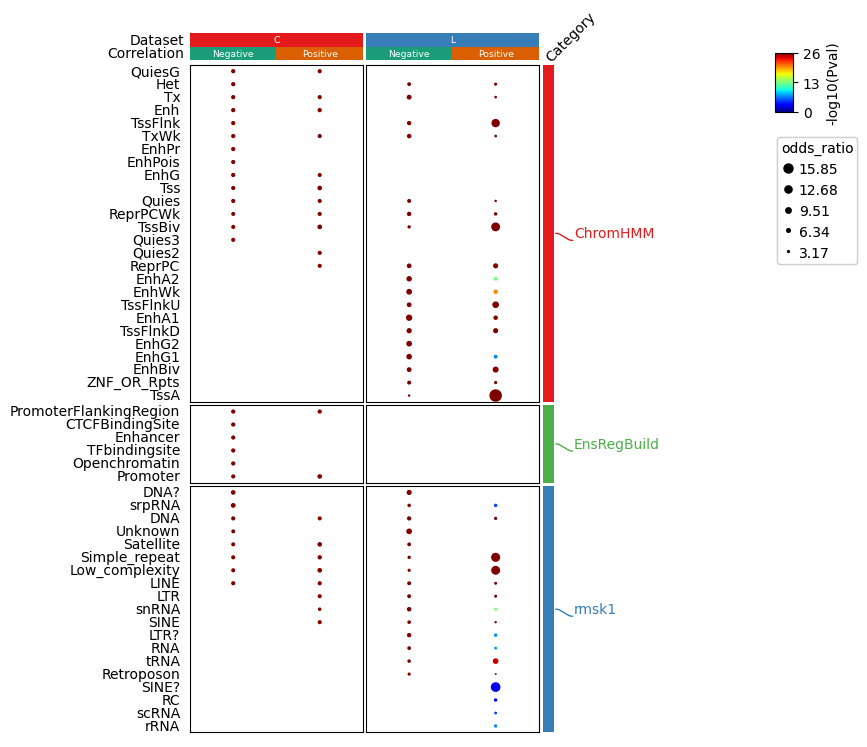

In [18]:
row_ha = HeatmapAnnotation(
                           Category=anno_simple(df_row.Category,cmap='Set1',
                                           add_text=False,legend=False),
                           label=anno_label(df_row.Category, merge=True,rotation=0),
                           axis=0,verbose=0,label_kws={'rotation':45,'horizontalalignment':'left'})

col_ha = HeatmapAnnotation(
                           Dataset=anno_simple(df_col.Dataset,cmap='Set1',legend=False,add_text=True),
                           Correlation=anno_simple(df_col.Correlation,cmap='Dark2',legend=False,add_text=True),
                           verbose=0,label_side='left',label_kws={'horizontalalignment':'right'})

plt.figure(figsize=(5, 8))
cm = DotClustermapPlotter(data=data, x='ID',y='Term',value='-log10(Pval)',c='-log10(Pval)',s='odds_ratio',
                          hue='EnrichType', row_cluster=False,cmap='jet',
                          colors={'Enrich':'red','Depletion':'blue'},
                          #marker={'Enrich':'^','Depletion':'v'},value_na=25,c_na=25,
                          top_annotation=col_ha,right_annotation=row_ha,
                          col_split=df_col.Dataset,row_split=df_row.Category, col_split_gap=0.5,row_split_gap=1,
                          show_rownames=True,show_colnames=False,row_dendrogram=False,
                          verbose=0,legend_gap=7) #xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'}
plt.show()

{'Enrich': 6.411756052747385, 'Depletion': 6.411756052747385} {'Enrich': 'P', 'Depletion': 'D'}
{'26.0': 6.411756052747385, '20.8': 5.129404842197908, '15.6': 3.8470536316484307, '10.4': 2.564702421098954, '5.2': 1.282351210549477} {'26.0': 'o', '20.8': 'o', '15.6': 'o', '10.4': 'o', '5.2': 'o'}


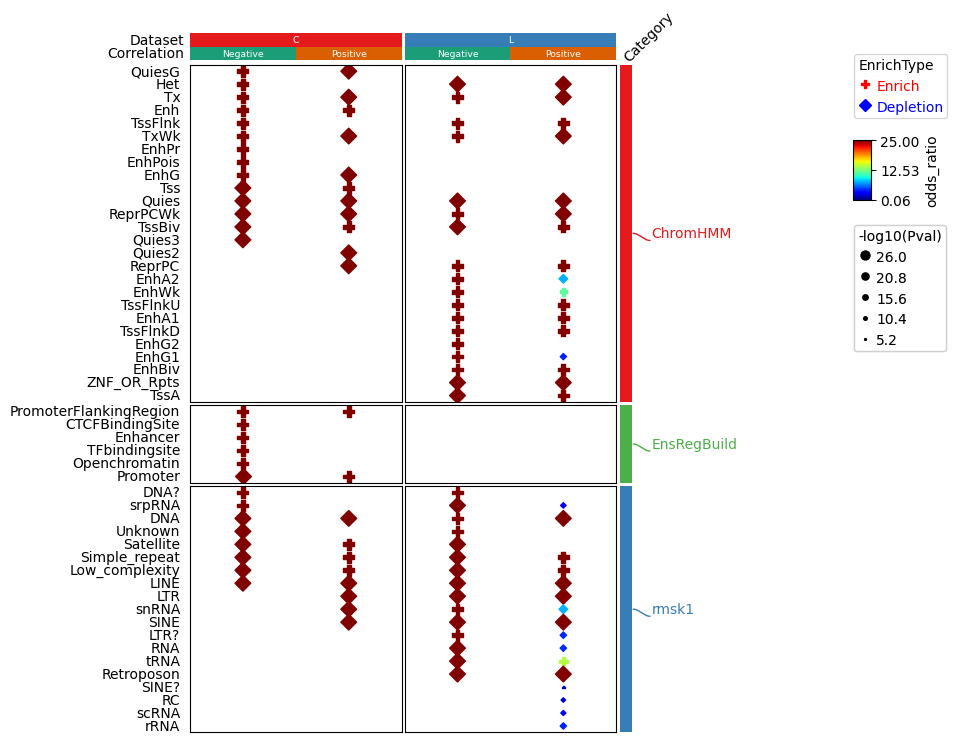

In [19]:
plt.figure(figsize=(6, 8))
cm = DotClustermapPlotter(data=data, x='ID',y='Term',value='odds_ratio',c='-log10(Pval)',s='-log10(Pval)',
                          hue='EnrichType', row_cluster=False,cmap='jet',
                          colors={'Enrich':'red','Depletion':'blue'},
                          marker={'Enrich':'P','Depletion':'D'},value_na=25,c_na=25,
                          top_annotation=col_ha,right_annotation=row_ha,
                          col_split=df_col.Dataset,row_split=df_row.Category, col_split_gap=0.5,row_split_gap=1,
                          show_rownames=True,verbose=0,legend_gap=7)
plt.savefig(os.path.expanduser("~/Gallery/20230227_kycg.pdf"),bbox_inches='tight')
plt.show()

In [20]:
data['-log10(Pval)'].describe()

count    115.000000
mean     23.883228 
std      6.359254  
min      1.571865  
25%      26.000000 
50%      26.000000 
75%      26.000000 
max      26.000000 
Name: -log10(Pval), dtype: float64

{'Enrich': 6.411756052747385, 'Depletion': 6.411756052747385} {'Enrich': 'P', 'Depletion': '_'}
{'26.0': 6.411756052747385, '20.8': 5.129404842197908, '15.6': 3.8470536316484307, '10.4': 2.564702421098954, '5.2': 1.282351210549477} {'26.0': 'o', '20.8': 'o', '15.6': 'o', '10.4': 'o', '5.2': 'o'}


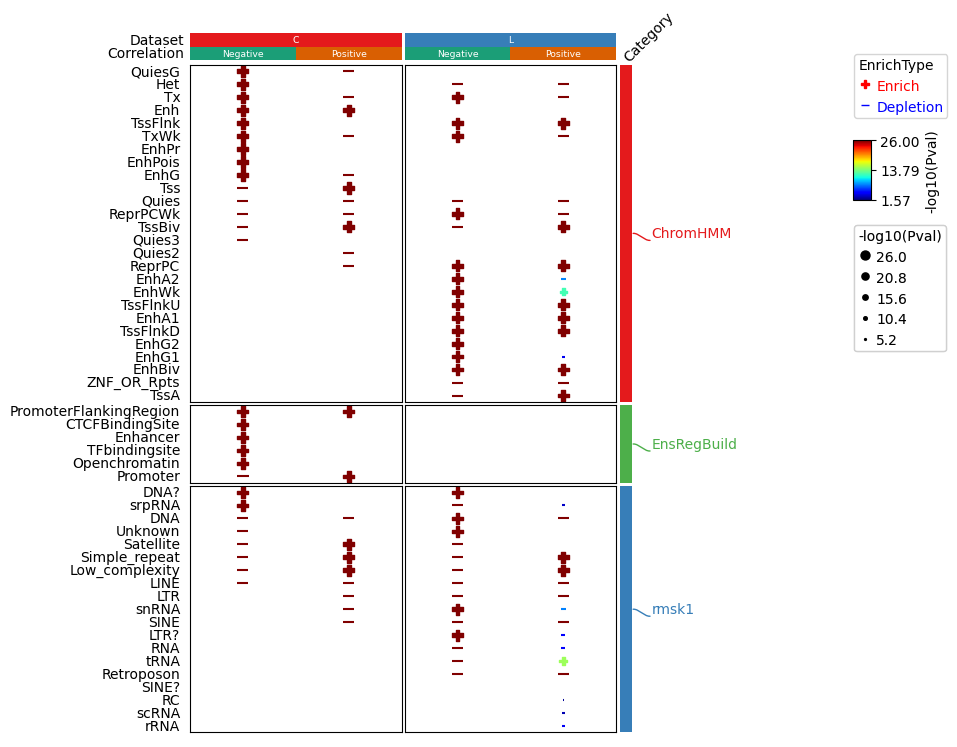

In [21]:
plt.figure(figsize=(6, 8))
cm = DotClustermapPlotter(data=data, x='ID',y='Term',value='-log10(Pval)',c='-log10(Pval)',#s='odds_ratio',
                          hue='EnrichType', row_cluster=False,cmap='jet',
                          colors={'Enrich':'red','Depletion':'blue'},
                          marker={'Enrich':'P','Depletion':'_'},value_na=25,c_na=25,
                          top_annotation=col_ha,right_annotation=row_ha,
                          col_split=df_col.Dataset,row_split=df_row.Category, col_split_gap=0.5,row_split_gap=1,
                          show_rownames=True,verbose=0,legend_gap=7)
plt.show()